In [1]:
#For numerical commputations
import numpy as np
#For data preprocessing
import pandas as pd
#For visualization
import matplotlib.pylab as plt
#For stating the charts should be in the same jupyter notebook and not in different window
%matplotlib inline
#For charts parameter tuning
from matplotlib.pylab import rcParams
#Setting figure size
rcParams['figure.figsize'] = 10, 6
#Getting the datatime parameters
from datetime import datetime

In [2]:
#Reading the 
dataset = pd.read_csv("./AirPassengers.csv")

In [4]:
#Printing the first five elements in the dataframe
dataset.tail()

Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

In [5]:
#Parse strings to datetime type
dataset["Month"] = pd.to_datetime(dataset["Month"], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [6]:
#Printing the first five elements of indexedDataset
indexedDataset.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [7]:
#Printing the first five elements of indexedDataset
indexedDataset.tail()

#Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

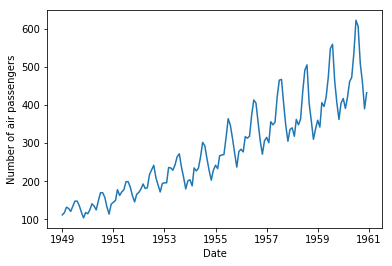

In [8]:
#Plot graph
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [9]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

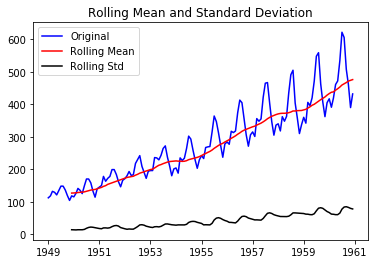

In [15]:
#Plot rolling statistics
orig = plt.plot(indexedDataset,color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [11]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("#############################")
print("Results of Dickey Fuller Test:")
dftest = adfuller(indexedDataset["#Passengers"], autolag = 'AIC')

print(dftest)

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
print("#############################")
print(dfoutput)

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print("#############################")
print(dfoutput)


#############################
Results of Dickey Fuller Test:
(0.8153688792060544, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
#############################
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
#############################
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


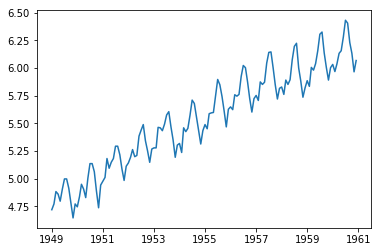

In [12]:
#Estimating the trend
indexedDataset_logScale = np.log(indexedDataset)
indexedDataset_logScale.head()
plt.plot(indexedDataset_logScale)

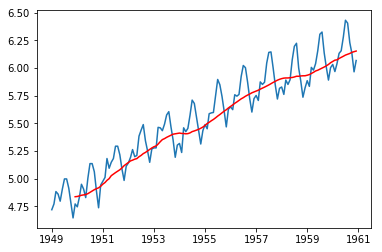

In [16]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [17]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN

In [18]:
#Removing NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()

#Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
    std = plt.plot(movingSTD,color='black',label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Plot Dickey-Fuller test
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries["#Passengers"], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput["Critical values (%s)"%key] = value
    print(dfoutput)
            

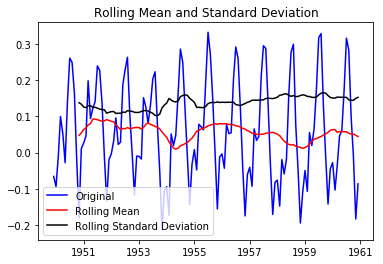

Results of Dickey Fuller Test:
Test Statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical values (1%)            -3.486535
Critical values (5%)            -2.886151
Critical values (10%)           -2.579896
dtype: float64


In [21]:
test_stationarity(datasetLogScaleMinusMovingAverage)

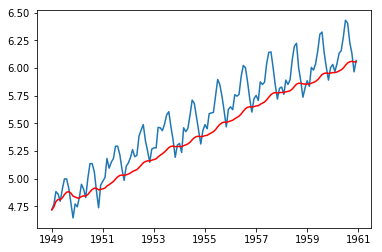

In [22]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

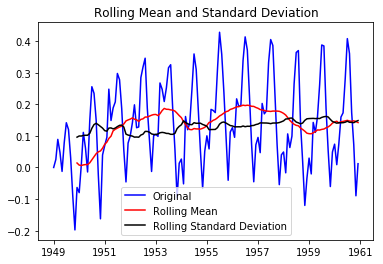

Results of Dickey Fuller Test:
Test Statistics                 -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical values (1%)            -3.481682
Critical values (5%)            -2.884042
Critical values (10%)           -2.578770
dtype: float64


In [23]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

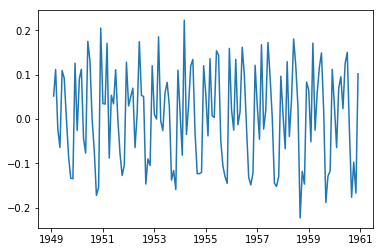

In [24]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

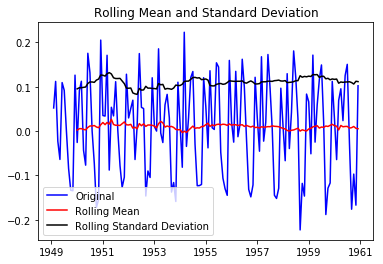

Results of Dickey Fuller Test:
Test Statistics                 -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical values (1%)            -3.482501
Critical values (5%)            -2.884398
Critical values (10%)           -2.578960
dtype: float64


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

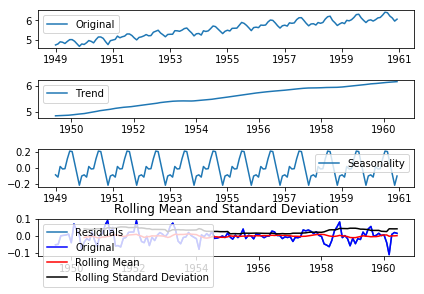

Results of Dickey Fuller Test:
Test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical values (1%)          -3.485122e+00
Critical values (5%)          -2.885538e+00
Critical values (10%)         -2.579569e+00
dtype: float64


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

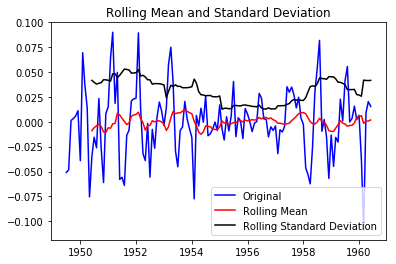

Results of Dickey Fuller Test:
Test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical values (1%)          -3.485122e+00
Critical values (5%)          -2.885538e+00
Critical values (10%)         -2.579569e+00
dtype: float64


In [27]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

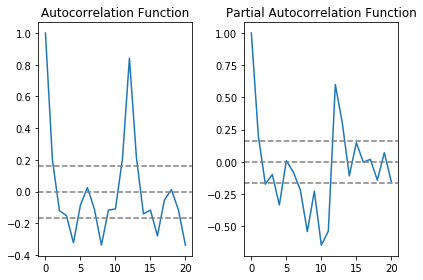

In [28]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = '--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = '--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/home/rishi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rishi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Printing AR Model


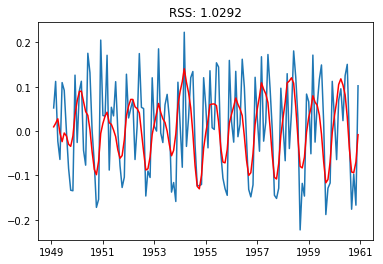

In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print("Printing AR Model")

Printing MA Model


/home/rishi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rishi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


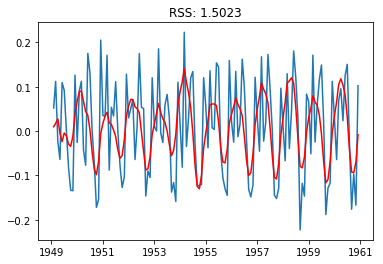

In [31]:
#MR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print("Printing MA Model")

/home/rishi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rishi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

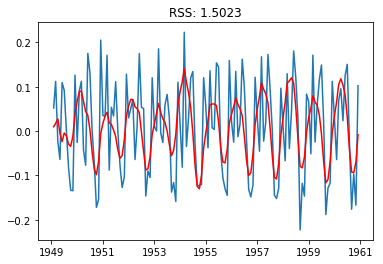

In [32]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))


In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [36]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale["#Passengers"].ix[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())
print(indexedDataset_logScale.head())

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64
            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791


/home/rishi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    112.000000
1949-02-01    113.078121
1949-03-01    115.073419
1949-04-01    118.302007
1949-05-01    117.768385
dtype: float64

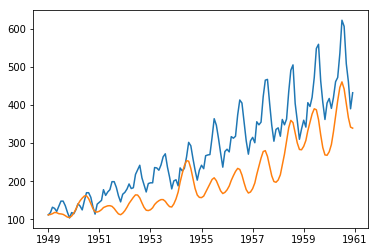

In [37]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
predictions_ARIMA.head()

In [38]:
indexedDataset_logScale.head()

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791

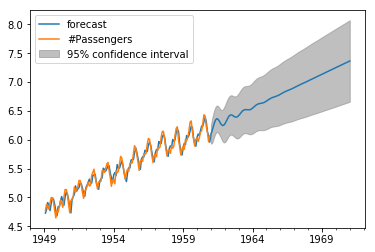

In [40]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)

In [41]:
x[1]

array([0.08384711, 0.10749461, 0.11568694, 0.11702775, 0.11703497,
       0.11744017, 0.1176225 , 0.11778713, 0.12024164, 0.12736047,
       0.13870969, 0.15118807, 0.16157831, 0.16834414, 0.17177349,
       0.17312001, 0.17358751, 0.17385477, 0.17430235, 0.17543349,
       0.17788166, 0.18195742, 0.18726241, 0.1928342 , 0.19769274,
       0.2013067 , 0.20369086, 0.20519863, 0.20625298, 0.20721027,
       0.20836999, 0.21000355, 0.21229773, 0.21524509, 0.21860212,
       0.22198291, 0.225031  , 0.22755331, 0.22954843, 0.23114834,
       0.23253861, 0.23390569, 0.23541345, 0.23718347, 0.23926573,
       0.24161574, 0.24410409, 0.24656396, 0.24885296, 0.2508967 ,
       0.25269774, 0.25431668, 0.25584352, 0.25737268, 0.25898429,
       0.26072889, 0.26261588, 0.2646113 , 0.2666494 , 0.26865523,
       0.27056891, 0.2723614 , 0.27403745, 0.27562817, 0.27717872,
       0.2787357 , 0.28033634, 0.28200061, 0.28372726, 0.28549554,
       0.28727255, 0.2890239 , 0.29072383, 0.29236129, 0.29394

In [42]:
len(x[1])

120

In [43]:
np.exp(x[1])

array([1.08746262, 1.11348486, 1.12264437, 1.12415062, 1.12415874,
       1.12461435, 1.12481941, 1.12500461, 1.12776933, 1.13582637,
       1.14879055, 1.1632154 , 1.1753645 , 1.18334378, 1.18740884,
       1.18900879, 1.18956478, 1.18988275, 1.19041543, 1.19176272,
       1.19468393, 1.19956312, 1.20594369, 1.21268171, 1.21858791,
       1.22299981, 1.22591911, 1.22776891, 1.2290641 , 1.23024123,
       1.2316688 , 1.23368244, 1.23651598, 1.24016581, 1.24433608,
       1.24855004, 1.25236154, 1.25552437, 1.2580318 , 1.26004614,
       1.26179916, 1.26352533, 1.26543185, 1.26767367, 1.27031606,
       1.27330482, 1.27647719, 1.27962102, 1.28255343, 1.28517731,
       1.28749405, 1.28958013, 1.29155061, 1.2935271 , 1.29561346,
       1.29787576, 1.30032714, 1.30292443, 1.30558263, 1.30820404,
       1.31070992, 1.31306145, 1.31526405, 1.31735794, 1.31940216,
       1.32145803, 1.32357491, 1.32577953, 1.32807066, 1.33042114,
       1.33278742, 1.33512364, 1.33739518, 1.33958691, 1.34170